In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [2]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')
cursor = conn.cursor()

In [3]:
# Getting the column names
statement = "select * from INFORMATION_SCHEMA.COLUMNS where table_name = 'dot_311'"
cursor.execute(statement)
columns = []
for row in cursor.fetchall():
    print(row)
    columns.append(row[3])
print(*columns)

['training', 'public', 'dot_311', 'gid', 1, "nextval('dot_311_gid_seq'::regclass)", 'NO', 'integer', None, None, 32, 2, 0, None, None, None, None, None, None, None, None, None, None, None, None, 'training', 'pg_catalog', 'int4', None, None, None, None, '1', 'NO', 'NO', None, None, None, None, None, None, 'NEVER', None, 'YES']
['training', 'public', 'dot_311', 'unique_key', 2, None, 'YES', 'numeric', None, None, 10, 10, 0, None, None, None, None, None, None, None, None, None, None, None, None, 'training', 'pg_catalog', 'numeric', None, None, None, None, '2', 'NO', 'NO', None, None, None, None, None, None, 'NEVER', None, 'YES']
['training', 'public', 'dot_311', 'agency', 5, None, 'YES', 'character varying', 254, 1016, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'training', 'pg_catalog', 'varchar', None, None, None, None, '5', 'NO', 'NO', None, None, None, None, None, None, 'NEVER', None, 'YES']
['training', 'public', 'dot_311', 'agency nam', 

In [4]:
statement = "SELECT unique_key, complaint, created_date, closed_date FROM dot_311"
cursor.execute(statement)
complaints = []
for row in cursor:
    complaints.append(row)


In [5]:
import pandas as pd
df = pd.DataFrame(complaints)
df.columns = ['unique_key', 'complaint', 'created_date', 'closed_date']
df_original = df.copy()

In [6]:
df['time'] = df['closed_date']-df['created_date']
df.head(3)

,unique_key,complaint,created_date,closed_date,time
0,32570549,Traffic Signal Condition,2016-02-01 00:12:00,2016-02-01 01:15:00,01:03:00
1,32572958,Traffic Signal Condition,2016-02-01 00:14:00,2016-02-01 00:54:00,00:40:00
2,32573576,Traffic Signal Condition,2016-02-01 00:15:00,2016-02-01 01:30:00,01:15:00


In [7]:
df['time'].describe()

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
Name: time, dtype: object

In [8]:
df['time'].value_counts().sort_values(ascending=False).head(10)

0 days 00:00:00      521
-3 days +00:00:00    184
-6 days +00:00:00    112
-2 days +00:00:00     27
-2 days +23:59:00     26
0 days 00:20:00       23
0 days 01:32:00       10
0 days 01:26:00       10
0 days 02:02:00        9
0 days 01:34:00        9
Name: time, dtype: int64

In [9]:
df = df[df['time'] > pd.Timedelta(hours=0)].dropna()
df['time'].describe()

count                       4547
mean      8 days 16:15:03.514405
std      15 days 10:48:08.619990
min              0 days 00:00:01
25%              0 days 12:41:58
50%              1 days 03:33:17
75%       6 days 00:30:23.500000
max             89 days 18:54:00
Name: time, dtype: object

In [10]:
df['time'].value_counts().sort_values(ascending=False).head(10)

00:20:00    23
01:32:00    10
01:26:00    10
02:02:00     9
00:25:00     9
01:34:00     9
01:27:00     9
00:40:00     9
00:45:00     8
01:42:00     8
Name: time, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 0 to 5850
Data columns (total 5 columns):
unique_key      4547 non-null object
complaint       4547 non-null object
created_date    4547 non-null datetime64[ns]
closed_date     4547 non-null datetime64[ns]
time            4547 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 213.1+ KB


In [12]:
df['time'].astype('timedelta64[h]').head(5)

0    1.0
1    0.0
2    1.0
3    2.0
4    0.0
Name: time, dtype: float64

In [14]:
df['time']=(df['time'])/(pd.Timedelta(hours=1))
df['time'].head(10)

0     1.050000
1     0.666667
2     1.250000
3     2.300000
4     0.683333
5     1.650000
6     1.133333
7     0.633333
8     0.166667
9    21.962222
Name: time, dtype: float64

In [19]:
df['time'].describe()

count    4547.000000
mean      208.250976
std       370.802394
min         0.000278
25%        12.699444
50%        27.554722
75%       144.506528
max      2154.900000
Name: time, dtype: float64

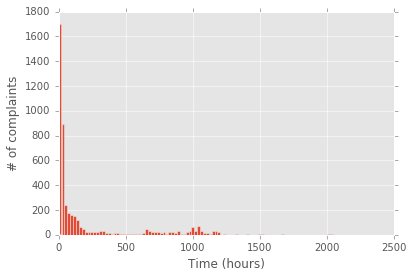

In [26]:
df['time'].hist(bins=100)
plt.xlabel('Time (hours)')
plt.ylabel('# of complaints')

#### Additional Analysis 

Top 3 popular type of complaint

Street Condition            1707
Street Light Condition       983
Traffic Signal Condition     807
Name: complaint, dtype: int64


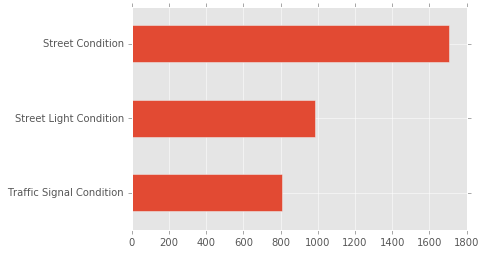

In [28]:
# Frequency Table

graph01 = df['complaint'].value_counts().head(3).sort_values(ascending=True).plot(kind='barh')
print("Top 3 popular type of complaint\n")
print(df['complaint'].value_counts().head(3).sort_values(ascending=False))
graph01

In [29]:
df.index = df['created_date']
df.head(2)

,unique_key,complaint,created_date,closed_date,time
created_date,,,,,
2016-02-01 00:12:00,32570549,Traffic Signal Condition,2016-02-01 00:12:00,2016-02-01 01:15:00,1.050000
2016-02-01 00:14:00,32572958,Traffic Signal Condition,2016-02-01 00:14:00,2016-02-01 00:54:00,0.666667


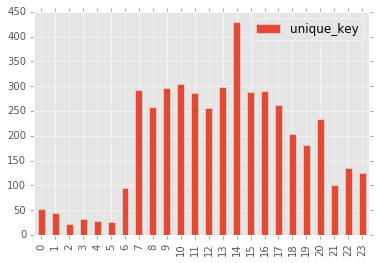

In [30]:
df.groupby(df.index.hour).count().plot(y='unique_key',kind='bar')